# Capstone Project ( 2nd Week)

## Table of contents
* [Introduction: Introduction and Problem Statement](#ProblemStatement)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## 1. Introduction and Problem Statement <a name="ProblemStatement"></a>

#### Problem Statement: Bayan Lepas has a lot of restaurants running in business. Japanese, Korea and  HongKong are the most popular restaurants in Bayan Lepas. 

#### Introduction: A seafood supplier from Bayan Lepas would like to know which type of asian cuisine restaurant is the most popular in Bayan Lepas so he can his distribution centre to supply his processed seafood according to popularity. 

#### Target Audience: A seafood supplier who want to know the most popular restaurants in Bayan Lepas and the best lcoation to set up the distributiion centre for processed seafood

## 2. Data <a name="data"></a>

#### To provide the information to the target audiece, i will use foursquare API to collect location data to find out the highest number of restaurants among Japanese, Hong Kong and Korea Restaurants located in Bayan Lepas neighboorhoods, Penang Malaysia.

#### Main data source used will be data from foursquare to analyze existing restaurant in Bayan Lepas.
* Location
* Distance of neighboorhood from centroid of defined location, less than 10km
*  Restaurant style ( e.g Japan, Korea, Chinese)
* Total Cout of restaurants by style


#### 2A. Import necessary library

In [457]:
import requests
import pandas as pd
import numpy as np
import random

from geopy.geocoders import Nominatim

from IPython.display import Image
from IPython.core.display import HTML

from pandas.io.json import json_normalize

! pip install folium==0.5.0
import folium

print('Folium')
print('Libraries imported.')

Folium
Libraries imported.


You should consider upgrading via the 'C:\Users\emeic\anaconda3\python.exe -m pip install --upgrade pip' command.


#### 2B. To obtain access token for FourSquare.


In [458]:
CLIENT_ID = 'GCHAC3EYUBC2IQJLY50DJ40UMTWHVJ4VNZCJVE2MJ4PALJ4A' # your Foursquare ID
CLIENT_SECRET = 'AC2YQWL4HJ4NO2L2XIPFRXC14FKFAB4NOWSISQAX0UNAESAY' # your Foursquare Secret
ACCESS_TOKEN = '3S4WCBTLZ1VCHMJTXX53XS1KBOR3OKENSIZAXR1B5DSQWPSF' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GCHAC3EYUBC2IQJLY50DJ40UMTWHVJ4VNZCJVE2MJ4PALJ4A
CLIENT_SECRET:AC2YQWL4HJ4NO2L2XIPFRXC14FKFAB4NOWSISQAX0UNAESAY


#### 2C. To obtain Coordinated of Centroid in Bayan Lepas 

In [459]:
address = 'Bayan Lepas, Penang, Malaysia'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)


5.295127 100.2604606


Then we'll project those coordinates back to latitude/longitude degrees to be shown on Folium map.

#### 2D. Defined information of interest : query specific venue for Japan, Korea, Chinese style for Restaurant. 

In [460]:
style = ['Japan' , 'Korean',  'Chinese']

venues=[]
radius = 10000
for i,x in enumerate(style):
    search_query=style[i]
    

    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
    
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venuesstyle = results['response']['venues']
    venues=venues+venuesstyle
    
    # tranform venues into a dataframe

dataframe = json_normalize(venues)
dataframe
    




C:\Users\emeic\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.address,location.formattedAddress,location.crossStreet,location.postalCode,location.city,location.state,location.neighborhood
0,507a5dc2e4b025807a18d078,"Motegi, Japan","[{'id': '4bf58dd8d48988d1f9931735', 'name': 'R...",v-1613141936,False,5.283117,100.281021,"[{'label': 'display', 'lat': 5.283116817474365...",2642,MY,Malaysia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52f4902a498e6fa2fe9b96df,japan home centre,"[{'id': '4bf58dd8d48988d128951735', 'name': 'G...",v-1613141936,False,5.333928,100.306958,"[{'label': 'display', 'lat': 5.333927732604248...",6724,MY,Malaysia,Queensbay Mall,[Queensbay Mall],NaN,NaN,NaN,NaN,NaN
2,50379698e4b04a184c04f524,japan mounting drift,"[{'id': '4bf58dd8d48988d1e2931735', 'name': 'A...",v-1613141936,False,5.331037,100.304624,"[{'label': 'display', 'lat': 5.331037084468665...",6319,MY,Malaysia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4d37f2ad3ffba143275e5756,Yokoso Japan,[],v-1613141936,False,5.333869,100.306975,"[{'label': 'display', 'lat': 5.33386903916004,...",6721,MY,Malaysia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4f85b284e4b047432f6fc08f,Ambassador Of Japan,"[{'id': '4bf58dd8d48988d12c951735', 'name': 'E...",v-1613141936,False,5.332724,100.212500,"[{'label': 'display', 'lat': 5.332723834337287...",6765,MY,Malaysia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,56f87b8a498e7b28d8385476,Balik Pulau Chinese Cemetary,"[{'id': '4bf58dd8d48988d15c941735', 'name': 'C...",v-1613141937,False,5.358778,100.225591,"[{'label': 'display', 'lat': 5.358778, 'lng': ...",8071,MY,Malaysia,Jalan Sungai Pinang,"[Jalan Sungai Pinang, 11000 Balik Pulau, Pulau...",NaN,11000,Balik Pulau,Pulau Pinang,NaN
70,4f9f3724e4b09d5a91ab8503,U-Garden Chinese Restaurant,"[{'id': '4bf58dd8d48988d11c941735', 'name': 'S...",v-1613141937,False,5.360436,100.296997,"[{'label': 'display', 'lat': 5.360435991330863...",8321,MY,Malaysia,550-1023-53,"[550-1023-53 (Minden Cross), 11700 Gelugor, Pu...",Minden Cross,11700,Gelugor,Pulau Pinang,NaN
71,55d9e55f498e8e677a20f85c,Aun Chinese Physician,"[{'id': '54541900498ea6ccd0202697', 'name': 'H...",v-1613141937,False,5.375157,100.275806,"[{'label': 'display', 'lat': 5.375156833490021...",9069,MY,Malaysia,10,"[10 (Tingkat Oriental 1), Paya Terubong, Pulau...",Tingkat Oriental 1,NaN,Paya Terubong,Pulau Pinang,NaN
72,4f04dd439a523e111eb15ceb,4A Right Side Chinese Temple,"[{'id': '4bf58dd8d48988d13a941735', 'name': 'T...",v-1613141937,False,5.384404,100.283722,"[{'label': 'display', 'lat': 5.384404255946322...",10267,MY,Malaysia,A Block,[A Block],NaN,NaN,NaN,NaN,NaN


In [461]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
         return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]


dataframe_filtered

,name,categories,lat,lng,labeledLatLngs,distance,cc,country,address,formattedAddress,crossStreet,postalCode,city,state,neighborhood,id
0,"Motegi, Japan",Road,5.283117,100.281021,"[{'label': 'display', 'lat': 5.283116817474365...",2642,MY,Malaysia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507a5dc2e4b025807a18d078
1,japan home centre,Gift Shop,5.333928,100.306958,"[{'label': 'display', 'lat': 5.333927732604248...",6724,MY,Malaysia,Queensbay Mall,[Queensbay Mall],NaN,NaN,NaN,NaN,NaN,52f4902a498e6fa2fe9b96df
2,japan mounting drift,Art Gallery,5.331037,100.304624,"[{'label': 'display', 'lat': 5.331037084468665...",6319,MY,Malaysia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50379698e4b04a184c04f524
3,Yokoso Japan,None,5.333869,100.306975,"[{'label': 'display', 'lat': 5.33386903916004,...",6721,MY,Malaysia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4d37f2ad3ffba143275e5756
4,Ambassador Of Japan,Embassy / Consulate,5.332724,100.212500,"[{'label': 'display', 'lat': 5.332723834337287...",6765,MY,Malaysia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4f85b284e4b047432f6fc08f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Balik Pulau Chinese Cemetary,Cemetery,5.358778,100.225591,"[{'label': 'display', 'lat': 5.358778, 'lng': ...",8071,MY,Malaysia,Jalan Sungai Pinang,"[Jalan Sungai Pinang, 11000 Balik Pulau, Pulau...",NaN,11000,Balik Pulau,Pulau Pinang,NaN,56f87b8a498e7b28d8385476
70,U-Garden Chinese Restaurant,Sake Bar,5.360436,100.296997,"[{'label': 'display', 'lat': 5.360435991330863...",8321,MY,Malaysia,550-1023-53,"[550-1023-53 (Minden Cross), 11700 Gelugor, Pu...",Minden Cross,11700,Gelugor,Pulau Pinang,NaN,4f9f3724e4b09d5a91ab8503
71,Aun Chinese Physician,Health & Beauty Service,5.375157,100.275806,"[{'label': 'display', 'lat': 5.375156833490021...",9069,MY,Malaysia,10,"[10 (Tingkat Oriental 1), Paya Terubong, Pulau...",Tingkat Oriental 1,NaN,Paya Terubong,Pulau Pinang,NaN,55d9e55f498e8e677a20f85c
72,4A Right Side Chinese Temple,Temple,5.384404,100.283722,"[{'label': 'display', 'lat': 5.384404255946322...",10267,MY,Malaysia,A Block,[A Block],NaN,NaN,NaN,NaN,NaN,4f04dd439a523e111eb15ceb


#### 2E. Custom new column for name in upper

In [462]:
dataframe_filtered['Name']=dataframe_filtered['name'].str.upper()

dataframe_filtered


,name,categories,lat,lng,labeledLatLngs,distance,cc,country,address,formattedAddress,crossStreet,postalCode,city,state,neighborhood,id,Name
0,"Motegi, Japan",Road,5.283117,100.281021,"[{'label': 'display', 'lat': 5.283116817474365...",2642,MY,Malaysia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507a5dc2e4b025807a18d078,"MOTEGI, JAPAN"
1,japan home centre,Gift Shop,5.333928,100.306958,"[{'label': 'display', 'lat': 5.333927732604248...",6724,MY,Malaysia,Queensbay Mall,[Queensbay Mall],NaN,NaN,NaN,NaN,NaN,52f4902a498e6fa2fe9b96df,JAPAN HOME CENTRE
2,japan mounting drift,Art Gallery,5.331037,100.304624,"[{'label': 'display', 'lat': 5.331037084468665...",6319,MY,Malaysia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50379698e4b04a184c04f524,JAPAN MOUNTING DRIFT
3,Yokoso Japan,None,5.333869,100.306975,"[{'label': 'display', 'lat': 5.33386903916004,...",6721,MY,Malaysia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4d37f2ad3ffba143275e5756,YOKOSO JAPAN
4,Ambassador Of Japan,Embassy / Consulate,5.332724,100.212500,"[{'label': 'display', 'lat': 5.332723834337287...",6765,MY,Malaysia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4f85b284e4b047432f6fc08f,AMBASSADOR OF JAPAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Balik Pulau Chinese Cemetary,Cemetery,5.358778,100.225591,"[{'label': 'display', 'lat': 5.358778, 'lng': ...",8071,MY,Malaysia,Jalan Sungai Pinang,"[Jalan Sungai Pinang, 11000 Balik Pulau, Pulau...",NaN,11000,Balik Pulau,Pulau Pinang,NaN,56f87b8a498e7b28d8385476,BALIK PULAU CHINESE CEMETARY
70,U-Garden Chinese Restaurant,Sake Bar,5.360436,100.296997,"[{'label': 'display', 'lat': 5.360435991330863...",8321,MY,Malaysia,550-1023-53,"[550-1023-53 (Minden Cross), 11700 Gelugor, Pu...",Minden Cross,11700,Gelugor,Pulau Pinang,NaN,4f9f3724e4b09d5a91ab8503,U-GARDEN CHINESE RESTAURANT
71,Aun Chinese Physician,Health & Beauty Service,5.375157,100.275806,"[{'label': 'display', 'lat': 5.375156833490021...",9069,MY,Malaysia,10,"[10 (Tingkat Oriental 1), Paya Terubong, Pulau...",Tingkat Oriental 1,NaN,Paya Terubong,Pulau Pinang,NaN,55d9e55f498e8e677a20f85c,AUN CHINESE PHYSICIAN
72,4A Right Side Chinese Temple,Temple,5.384404,100.283722,"[{'label': 'display', 'lat': 5.384404255946322...",10267,MY,Malaysia,A Block,[A Block],NaN,NaN,NaN,NaN,NaN,4f04dd439a523e111eb15ceb,4A RIGHT SIDE CHINESE TEMPLE


#### 2F. Visualize the data we have so far: city center location and Japan, Korea, Asia Restaurant in neighborhood centers

In [463]:
if len(results['response']['venues']) == 0:
    venues_map = 'Cannot generate visual as no trending venues are available at the moment!'

else:
    venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


    # add Ecco as a red circle mark
    folium.CircleMarker(
        [latitude, longitude],
        radius=10,
        popup='Ecco',
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)


    # add the trending venues as blue circle markers
    for lat, lng, label in zip(dataframe_filtered_restaurant['lat'], dataframe_filtered_restaurant['lng'], dataframe_filtered_restaurant['name']):
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            poup=label,
            fill=True,
            color='blue',
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map)

venues_map

In [464]:
dataframe_filtered=dataframe_filtered[['name', 'categories','lat','lng','distance']]
dataframe_filtered
dataframe_filtered_restaurant=dataframe_filtered[dataframe_filtered['categories'].str.contains('Restaurant', na=False)]
dataframe_filtered_restaurant

,name,categories,lat,lng,distance
6,Fukushima Japanese Restaurant,Japanese Restaurant,5.287975,100.281610,2475
7,Wakaba Japanese Noodle Restaurant,Japanese Restaurant,5.323022,100.281763,3900
8,Kaze Japanese Restaurant,Japanese Restaurant,5.325103,100.281936,4098
10,Tsuruya Japanese Restaurant,Japanese Restaurant,5.325470,100.280060,4016
11,Azuma Japanese Restaurant,Japanese Restaurant,5.331976,100.307513,6635
12,Umi Japanese Restaurant,Japanese Restaurant,5.287232,100.232656,3204
13,Sakurajima (樱岛) Japanese & Chinese Restaurant,Asian Restaurant,5.336186,100.283769,5250
14,Japanese Food @ Bali Bali,Japanese Restaurant,5.350764,100.294887,7274
15,Wagyu Japanese Bbq & Shabu Shabu,Japanese Restaurant,5.332018,100.295846,5678
16,Tsuruya Japanese Restaurant (鶴屋日本料理),Japanese Restaurant,5.333246,100.292998,5568


#### 2G. Checked new created dataframe and ensure all restaurants in query list are categorized

In [465]:
Categories=dataframe_filtered_restaurant["categories"]
Name=dataframe_filtered_restaurant["name"]
dataframe_filtered_restaurant["restaurant_style"] = pd.np.where(Categories.str.contains("Japanese"), "Japan",
                   pd.np.where(Categories.str.contains("Korea"), "Korea",
                   pd.np.where(Categories.str.contains("Chinese"), "Chinese", 
                   pd.np.where(Categories.str.contains("JAPANESE"), "Japan",
                   pd.np.where(Categories.str.contains("KOREAN"), "Korea",
                   pd.np.where(Name.str.contains("Chinese"), "Chinese", 'NaN'))))))

dataframe_filtered_restaurant[dataframe_filtered_restaurant['restaurant_style']=='NaN']

C:\Users\emeic\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\emeic\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
C:\Users\emeic\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """
C:\Users\emeic\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
C:\Users\emeic\anaconda3\lib\site-packages\ipykernel_launcher.py:

,name,categories,lat,lng,distance,restaurant_style


## 3. Methodology <a name="methodology"></a>

#### 3A. Scatter plot of latitude and longitude location of Japan, Chinese and Korea Restaurant located within 10km from Centroid of Bayan Lepas

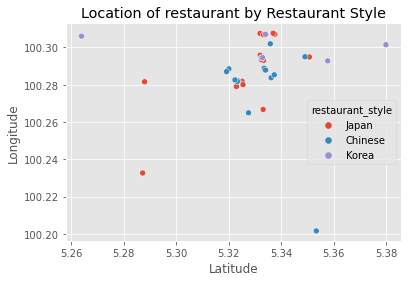

In [466]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.scatterplot(data=dataframe_filtered_restaurant, x="lat", y="lng", hue="restaurant_style")
plt.title('Location of restaurant by Restaurant Style')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

#### 3B. Calculated total number of restaurants group by restaurant style 

In [467]:
dataframe_filtered_restaurant_count=dataframe_filtered_restaurant.groupby('restaurant_style')['name'].count().reset_index(name="count")
dataframe_filtered_restaurant_count

,restaurant_style,count
0,Chinese,13
1,Japan,16
2,Korea,7


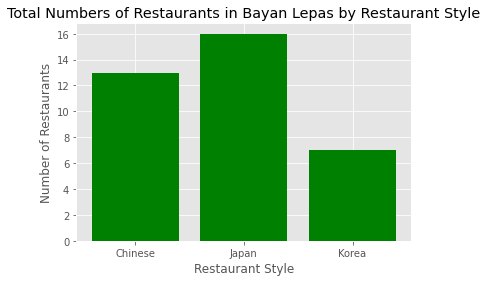

In [468]:
plt.style.use('ggplot')
plt.bar(x='restaurant_style', height='count', width=0.8,data=dataframe_filtered_restaurant_count, color='green')

plt.xlabel("Restaurant Style")
plt.ylabel("Number of Restaurants")
plt.title("Total Numbers of Restaurants in Bayan Lepas by Restaurant Style")



plt.show()

In [469]:
dataframe_filtered_restaurant_count=dataframe_filtered_restaurant.groupby('restaurant_style').count()


#### 3C. Histogram of Total Number of Restaurant within 10km from Centroid

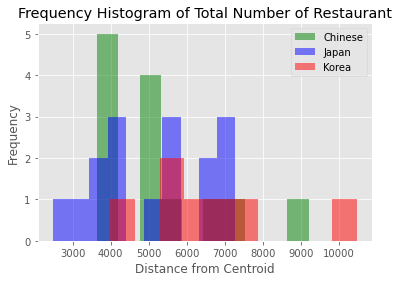

In [470]:
x1 = dataframe_filtered_restaurant.loc[dataframe_filtered_restaurant.restaurant_style=='Chinese', 'distance']
x2 = dataframe_filtered_restaurant.loc[dataframe_filtered_restaurant.restaurant_style=='Japan', 'distance']
x3 = dataframe_filtered_restaurant.loc[dataframe_filtered_restaurant.restaurant_style=='Korea', 'distance']

kwargs = dict(alpha=0.5, bins=10)

plt.hist(x1, **kwargs, color='g', label='Chinese')
plt.hist(x2, **kwargs, color='b', label='Japan')
plt.hist(x3, **kwargs, color='r', label='Korea')
plt.gca().set(title='Frequency Histogram of Total Number of Restaurant', ylabel='Frequency', xlabel='Distance from Centroid')

plt.legend();

## 4. Result and Discussion <a name="results"></a>

a. Total 37 of our interest restaurants are within 10km neighbouring of centroid of Bayan Lepas.

b. Japanese style restaurants is the most popular restaurant. It has the highest number of restaurant within 10km neighbouring of Bayan Lepas, followed by Chinese style and Korea style.

c. Most of Japanese, Chinese and Korea restaurants are located at latitude 5.32 to latitude 5.36, and longitude 100.26 to longitude 100.31.

d. Majority of Chinese Restaurant are within 4km to 5km from centroid while Japanese restaurant are focus within distance 7km from centroid. Korean style restaurants are randomly distributed compare with other restaurants 

#### Discussion section where you discuss any observations you noted and any recommendations you can make based on the results

## 5. Conclusion <a name="conclusion"></a>

Sea food provider should target Japanese style restaurant as their customer as they are the major player. The best location for him to set up his distribution centre will be within 2.5km to 7km from centroid of Bayan Lepas as all japanense restaurant are running the bussiness near to centroid of Bayan Lepas